In [2]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from datetime import datetime
import calendar


%matplotlib inline
plt.style.use('seaborn-whitegrid') 
import matplotlib.pyplot as plt
#import squarify 
#pip install squarify

Mounted at /content/drive


In [3]:
df_train = pd.read_csv("/content/drive/MyDrive/train.csv",nrows=200000)
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df_train.shape

(200000, 8)

In [5]:
df_train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [6]:
df_train.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.342877,-72.506121,39.922326,-72.518673,39.925579,1.682445
std,9.837855,11.608097,10.048947,10.724226,6.751120,1.306730
min,-44.900000,-736.550000,-3116.285383,-1251.195890,-1189.615440,0.000000
25%,6.000000,-73.992050,40.735007,-73.991295,40.734092,1.000000
50%,8.500000,-73.981743,40.752761,-73.980072,40.753225,1.000000
75%,12.500000,-73.967068,40.767127,-73.963508,40.768070,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


In [7]:
df_test=pd.read_csv("/content/drive/MyDrive/test.csv",nrows=1_000)
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [8]:
df_test.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Fare Amount')

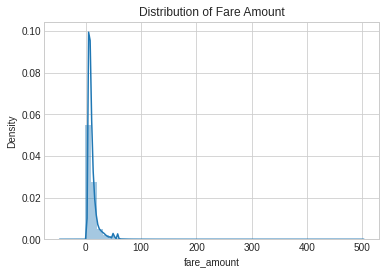

In [9]:
sns.distplot(df_train['fare_amount'])
plt.title('Distribution of Fare Amount')

## 1. Removing all the taxi trips which has negative fare amount.


In [10]:
#Remove data which has the fare amount negative.
print('Old size: %d' % len(df_train))
df_train = df_train[df_train.fare_amount>=0]
print('New size: %d' % len(df_train))

Old size: 200000
New size: 199987


## 2.Removing taxi trips that have missing data.

In [11]:
#count of missing data with respect to attributes:
print(df_train.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [12]:
#Removing the records with missing data.
print('Old size: %d' % len(df_train))
df_train = df_train.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(df_train))


Old size: 199987
New size: 199986


## 3. Removing taxi trips those have passenger count less than zero and greater than six.

In [ ]:
print('Old size: %d' % len(df_train))
df_train = df_train[df_train.passenger_count<=6]
df_train = df_train[df_train.passenger_count>0]
print('New size: %d' % len(df_train))

Old size: 199986
New size: 199273


/Users/ghannesh59/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


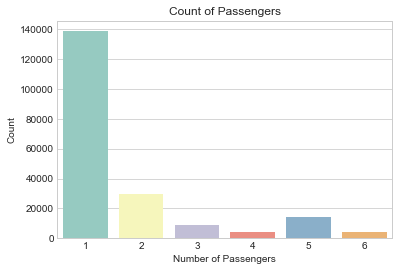

In [ ]:
passenger = df_train.groupby(['passenger_count']).count()
sns.barplot(passenger.index, passenger['key'], palette = "Set3")
plt.xlabel('Number of Passengers')
plt.ylabel('Count')
plt.title('Count of Passengers')
plt.show()

In [ ]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
def groupandplot(data,groupby_key,value,aggregate='mean'):
    #plt.figure(figsize=(16,10))
    agg_data=data.groupby([groupby_key])[value].agg(aggregate).reset_index().rename(columns={value:aggregate+'_'+value})
    #plt.subplot(1,2,1)
    #count_data=train_df.groupby([groupby_key])['key'].count().reset_index().rename(columns={'key':'Num_Trips'})
    #sns.barplot(x=groupby_key,y='Num_Trips',data=count_data).set_title("Number of Trips vs "+groupby_key)
    
    #plt.subplot(1,2,2)
    sns.barplot(x=groupby_key,y=aggregate+'_'+value,data=agg_data).set_title(aggregate+'_'+value+" vs "+groupby_key)

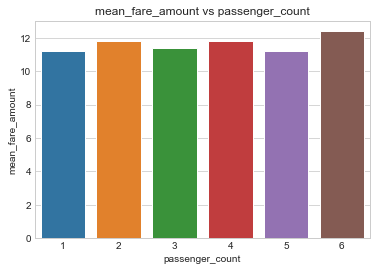

In [ ]:
groupandplot(df_train,'passenger_count','fare_amount')

## 4. Removing taxi trips having zero feature value which is not useful.

In [13]:
print('Old size: %d' % len(df_train))
df_train = df_train.loc[~(df_train == 0).any(axis=1)]
print('New size: %d' % len(df_train))

Old size: 199986
New size: 195334


## Converting the pickup_datetime attribute of type Object to different primitive types using lambda functions.

In [14]:
df_train['pickup_datetime']=pd.to_datetime(df_train['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')

df_train['pickup_date']= df_train['pickup_datetime'].dt.date
df_train['pickup_day']=df_train['pickup_datetime'].apply(lambda x:x.day)
df_train['pickup_hour']=df_train['pickup_datetime'].apply(lambda x:x.hour)
df_train['pickup_day_of_week']=df_train['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
df_train['pickup_month']=df_train['pickup_datetime'].apply(lambda x:x.month)
df_train['pickup_year']=df_train['pickup_datetime'].apply(lambda x:x.year)

## Statistical Visualizations using Matplotlib

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Taxi Rides per Day of Week')

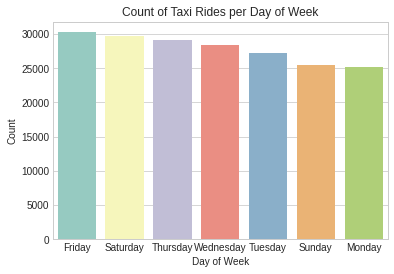

In [15]:
day_count = df_train.groupby(['pickup_day_of_week']).count().sort_values(by ='key', ascending = False)
sns.barplot(day_count.index, day_count['key'], palette = "Set3")
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Count of Taxi Rides per Day of Week')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Taxi Rides per Day of Month')

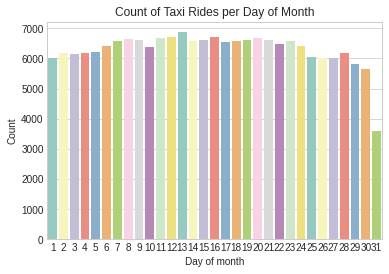

In [16]:
day_count = df_train.groupby(['pickup_day']).count().sort_values(by = 'key', ascending = False)
sns.barplot(day_count.index, day_count['key'], palette = "Set3")
plt.xlabel('Day of month')
plt.ylabel('Count')
plt.title('Count of Taxi Rides per Day of Month')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Average Fare Amount per Day of Week')

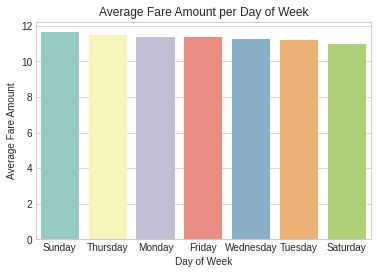

In [17]:
day_fare = df_train.groupby(['pickup_day_of_week']).mean().sort_values(by = 'fare_amount', ascending = False)

sns.barplot(day_fare.index, day_fare.fare_amount, palette = "Set3")

plt.xlabel('Day of Week')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount per Day of Week')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Total Rides Given During Each Day')

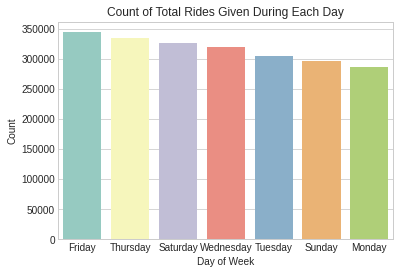

In [18]:
day_sum = df_train.groupby(['pickup_day_of_week']).sum().sort_values(by = 'fare_amount', ascending = False)

sns.barplot(day_sum.index, day_sum.fare_amount, palette = "Set3")

plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Count of Total Rides Given During Each Day')



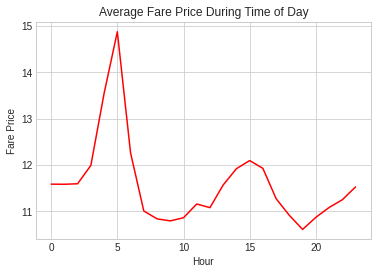

In [19]:
time_of_day = df_train.groupby(['pickup_hour']).mean()
plt.plot(time_of_day.index, time_of_day.fare_amount, color = 'r')
plt.xlabel('Hour')
plt.ylabel('Fare Price')
plt.title('Average Fare Price During Time of Day')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


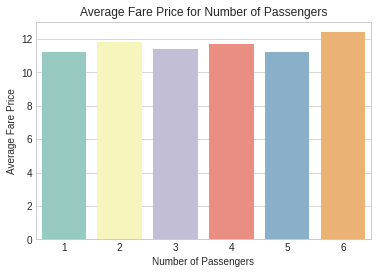

In [20]:
passenger_fare = df_train.groupby(['passenger_count']).mean()
sns.barplot(passenger_fare.index, passenger_fare['fare_amount'], palette = "Set3")
plt.xlabel('Number of Passengers')
plt.ylabel('Average Fare Price')
plt.title('Average Fare Price for Number of Passengers')
plt.show()

In [21]:
#let us convert day of the week to int datatyp
def encodeDays(day_of_week):
    day_dict={'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
    return day_dict[day_of_week]

In [22]:
df_train['pickup_day_of_week']=df_train['pickup_day_of_week'].apply(lambda x:encodeDays(x))

In [23]:
df_train.dtypes

key                           object
fare_amount                  float64
pickup_datetime       datetime64[ns]
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
passenger_count                int64
pickup_date                   object
pickup_day                     int64
pickup_hour                    int64
pickup_day_of_week             int64
pickup_month                   int64
pickup_year                    int64
dtype: object

In [24]:
#dropping the unnecessary data
df_train = df_train.drop(['key','pickup_datetime','pickup_date'], axis=1)
df_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010


## This is how the dataset looks after initial analysis and feature engineering on the pickup_date_time

In [25]:
df_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010


## Calculate distance between coordinates with the hypothesis being fare increases with increase in distance

In [26]:
def distance(lat1, lat2, lon1,lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [27]:
df_train['trip_distance']=df_train.apply(lambda row:distance(row['pickup_latitude'],row['dropoff_latitude']
                                                             ,row['pickup_longitude'],row['dropoff_longitude']),axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Distribution of Trip Distance (log scale)')

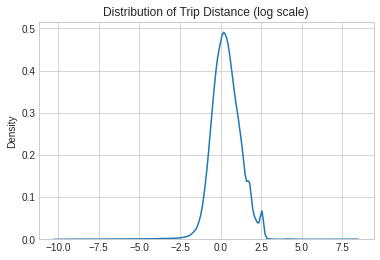

In [28]:
sns.kdeplot(np.log(df_train['trip_distance'].values)).set_title("Distribution of Trip Distance (log scale)")

Text(0, 0.5, 'Fare Amount')

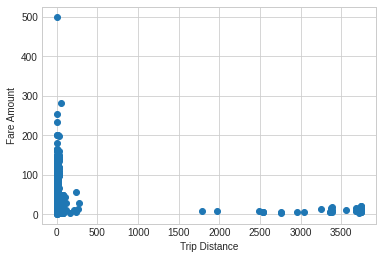

In [29]:
plt.scatter(x=df_train['trip_distance'],y=df_train['fare_amount'])
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")

In [30]:
df_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,trip_distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,1.242218


In [31]:
long_trips=df_train[df_train['trip_distance']>=50]

## Fetching NYC coordinates and dividing the city into burroughs which provides us with new features being pickup and dropoff burroughs

In [32]:
nyc_boroughs={
    'manhattan':{
        'min_lng':-74.0479,
        'min_lat':40.6829,
        'max_lng':-73.9067,
        'max_lat':40.8820
    },
    
    'queens':{
        'min_lng':-73.9630,
        'min_lat':40.5431,
        'max_lng':-73.7004,
        'max_lat':40.8007

    },

    'brooklyn':{
        'min_lng':-74.0421,
        'min_lat':40.5707,
        'max_lng':-73.8334,
        'max_lat':40.7395

    },

    'bronx':{
        'min_lng':-73.9339,
        'min_lat':40.7855,
        'max_lng':-73.7654,
        'max_lat':40.9176

    },

    'staten_island':{
        'min_lng':-74.2558,
        'min_lat':40.4960,
        'max_lng':-74.0522,
        'max_lat':40.6490
        
    }  
}

In [33]:
def getBorough(lat,lng):
    
    locs=nyc_boroughs.keys()
    for loc in locs:
        if lat>=nyc_boroughs[loc]['min_lat'] and lat<=nyc_boroughs[loc]['max_lat'] and lng>=nyc_boroughs[loc]['min_lng'] and lng<=nyc_boroughs[loc]['max_lng']:
            return loc
    return 'others'

In [34]:
df_train['pickup_borough']=df_train.apply(lambda row:getBorough(row['pickup_latitude'],row['pickup_longitude']),axis=1)
df_train['dropoff_borough']=df_train.apply(lambda row:getBorough(row['dropoff_latitude'],row['dropoff_longitude']),axis=1)

## Statistical analysis of burroughs by count and also the average fare amount and distance across each burrough

Text(0.5, 1.0, 'Distribution of Pickup Boroughs')

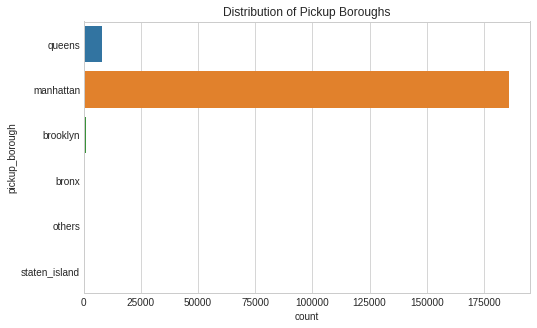

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(y=df_train['pickup_borough'])
plt.title("Distribution of Pickup Boroughs")

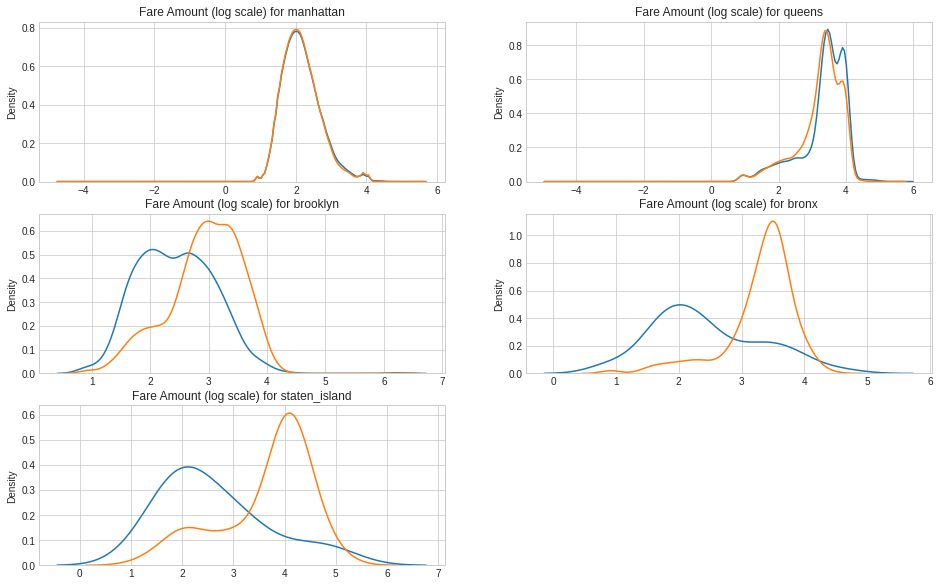

In [36]:
plt.figure(figsize=(16,10))
plt.title("Distribution of Fare Amount Across Buroughs")
i=1
for key in nyc_boroughs.keys():
    plt.subplot(3,2,i)
    sns.kdeplot(np.log(df_train.loc[df_train['pickup_borough']==key,'fare_amount'].values),label='Pickup '+ key)
    sns.kdeplot(np.log(df_train.loc[df_train['dropoff_borough']==key,'fare_amount'].values),label='Dropoff'+ key).set_title("Fare Amount (log scale) for "+key)
    i=i+1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7

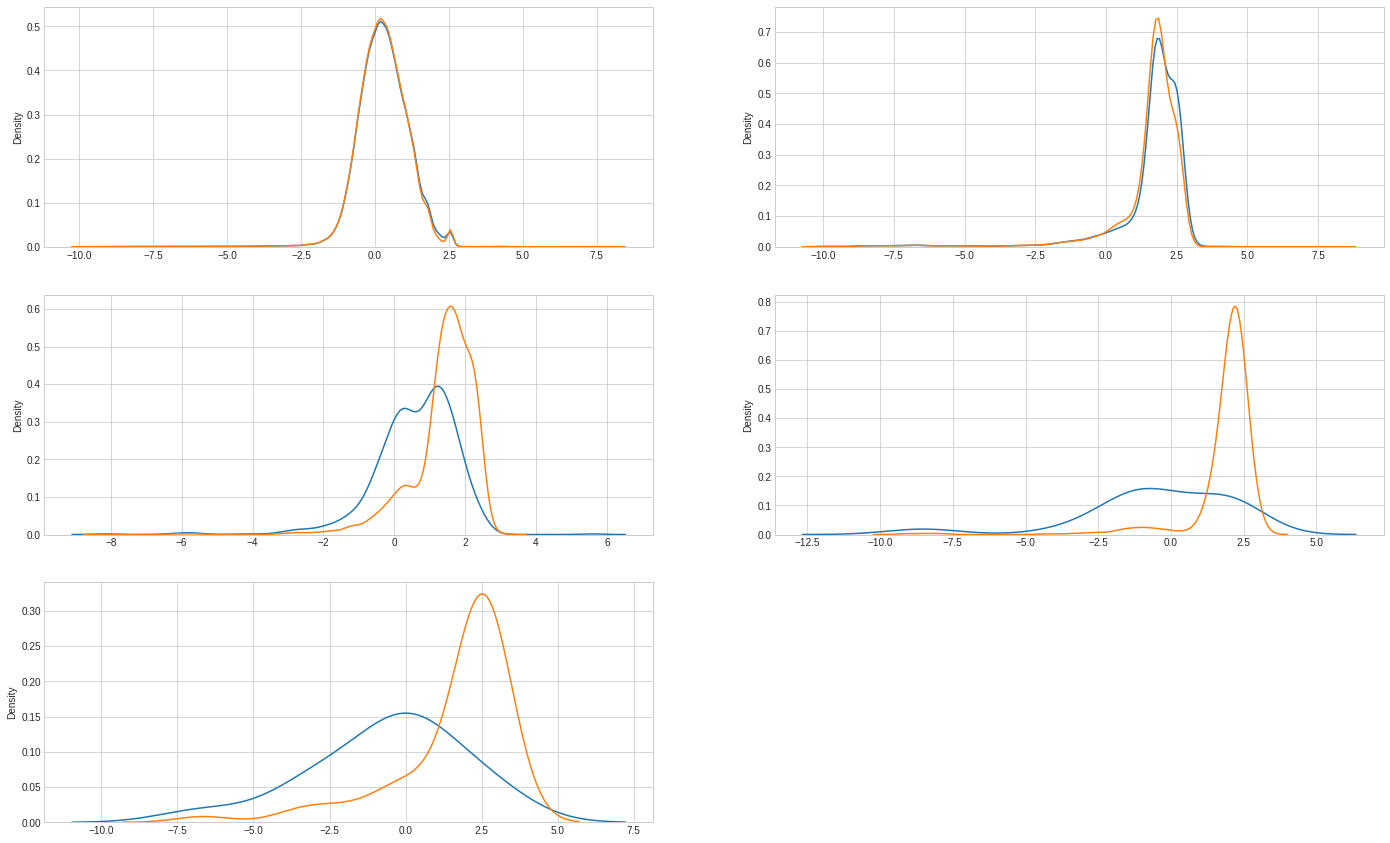

In [37]:
plt.figure(figsize=(24,15))
plt.title("Distribution of Trip Distances Across Buroughs")
i=1
for key in nyc_boroughs.keys():
    plt.subplot(3,2,i)
    sns.kdeplot(np.log(df_train.loc[df_train['pickup_borough']==key,'trip_distance'].values),label='Pickup '+ key)
    sns.kdeplot(np.log(df_train.loc[df_train['dropoff_borough']==key,'trip_distance'].values),label='Dropoff'+ key).set_title
    ("Trip Distance (log) for "+key)
    i=i+1

In [38]:
lower_manhattan_boundary={'min_lng': -74.0194,
                          'min_lat':40.6997,
                          'max_lng':-73.9716,
                          'max_lat':40.7427}

def isLowerManhattan(lat,lng):
    if lat>=lower_manhattan_boundary['min_lat'] and lat<=lower_manhattan_boundary['max_lat'] and lng>=lower_manhattan_boundary['min_lng'] and lng<=lower_manhattan_boundary['max_lng']:
        return 1
    else:
        return 0

In [39]:
df_train['is_pickup_lower_manhattan']=df_train.apply(lambda row:isLowerManhattan(row['pickup_latitude'],row['pickup_longitude']),axis=1)
df_train['is_dropoff_lower_manhattan']=df_train.apply(lambda row:isLowerManhattan(row['dropoff_latitude'],row['dropoff_longitude']),axis=1)

In [40]:
df_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,trip_distance,pickup_borough,dropoff_borough,is_pickup_lower_manhattan,is_dropoff_lower_manhattan
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,0.640487,queens,queens,0,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,5.250670,manhattan,manhattan,1,0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,0.863411,manhattan,manhattan,0,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,1.739386,manhattan,manhattan,1,0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,1.242218,manhattan,manhattan,0,0


## Dividing trips by pickup and dropoff to airports as it was found that some coordinates having constant fare amount were the 3 airports in and around NYC

In [41]:
nyc_airports={'JFK':{'min_lng':-73.8352,
     'min_lat':40.6195,
     'max_lng':-73.7401, 
     'max_lat':40.6659},
              
    'EWR':{'min_lng':-74.1925,
            'min_lat':40.6700, 
            'max_lng':-74.1531, 
            'max_lat':40.7081

        },
    'LaGuardia':{'min_lng':-73.8895, 
                  'min_lat':40.7664, 
                  'max_lng':-73.8550, 
                  'max_lat':40.7931
        
    }
    
}
def isAirport(latitude,longitude,airport_name='JFK'):
    
    if latitude>=nyc_airports[airport_name]['min_lat'] and latitude<=nyc_airports[airport_name]['max_lat'] and longitude>=nyc_airports[airport_name]['min_lng'] and longitude<=nyc_airports[airport_name]['max_lng']:
        return 1
    else:
        return 0
        
df_train['is_pickup_JFK']=df_train.apply(lambda row:isAirport(row['pickup_latitude'],row['pickup_longitude'],'JFK'),axis=1)
df_train['is_dropoff_JFK']=df_train.apply(lambda row:isAirport(row['dropoff_latitude'],row['dropoff_longitude'],'JFK'),axis=1)

In [42]:
df_train['is_pickup_EWR']=df_train.apply(lambda row:isAirport(row['pickup_latitude'],row['pickup_longitude'],'EWR'),axis=1)
df_train['is_dropoff_EWR']=df_train.apply(lambda row:isAirport(row['dropoff_latitude'],row['dropoff_longitude'],'EWR'),axis=1)

In [43]:
df_train['is_pickup_la_guardia']=df_train.apply(lambda row:isAirport(row['pickup_latitude'],row['pickup_longitude'],'LaGuardia'),axis=1)
df_train['is_dropoff_la_guardia']=df_train.apply(lambda row:isAirport(row['dropoff_latitude'],row['dropoff_longitude'],'LaGuardia'),axis=1)

In [44]:
mean=np.mean(df_train['pickup_hour'].value_counts())
dev=np.std(df_train['pickup_hour'].value_counts())
taxi_count=df_train['pickup_hour'].value_counts()
m1=mean-dev
m2=mean+dev

In [45]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
df_train["pickup_borough"] = number.fit_transform(df_train["pickup_borough"].astype('str'))
df_train["dropoff_borough"] = number.fit_transform(df_train["dropoff_borough"].astype('str'))
print (df_train.corr('pearson')["fare_amount"])

fare_amount                   1.000000
pickup_longitude              0.004688
pickup_latitude              -0.004640
dropoff_longitude             0.006379
dropoff_latitude             -0.003678
passenger_count               0.013600
pickup_day                   -0.000554
pickup_hour                  -0.018136
pickup_day_of_week           -0.011963
pickup_month                  0.022897
pickup_year                   0.115301
trip_distance                 0.043485
pickup_borough                0.455330
dropoff_borough               0.334012
is_pickup_lower_manhattan    -0.042811
is_dropoff_lower_manhattan   -0.083331
is_pickup_JFK                 0.408714
is_dropoff_JFK                0.324005
is_pickup_EWR                 0.053971
is_dropoff_EWR                0.222243
is_pickup_la_guardia          0.279979
is_dropoff_la_guardia         0.226536
Name: fare_amount, dtype: float64


In [46]:
pickup_JFK = df_train.apply(lambda column : True
            if column['is_pickup_JFK'] == 1 else False, axis = 1)
num_rows = len(df_train[pickup_JFK == True].index)
pickup_EWR = df_train.apply(lambda column : True
            if column['is_pickup_EWR'] == 1 else False, axis = 1)
num_rows1 = len(df_train[pickup_EWR== True].index)
pickup_la_guardia=df_train.apply(lambda column : True
            if column['is_pickup_la_guardia'] == 1 else False, axis = 1)
num_rows2 = len(df_train[pickup_la_guardia == True].index)
pickup_borogh=df_train.apply(lambda column : True
            if column['pickup_borough'] == 1 else False, axis = 1)
num_rows3=len(df_train[pickup_borogh == True].index)



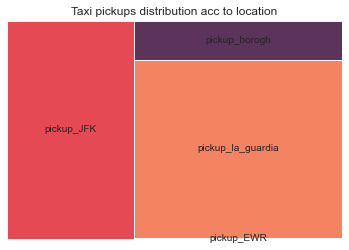

In [ ]:

values=[num_rows,num_rows1,num_rows2,num_rows3]
labels=['pickup_JFK','pickup_EWR','pickup_la_guardia','pickup_borogh']
import squarify
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= values# proportions of the categories
label=labels
squarify.plot(sizes=values, label=labels, alpha=0.9).set(title='Taxi pickups distribution acc to location')
plt.axis('off')
plt.show()

In [47]:
#Removing variables which are having low correlation coeficients
df_train=df_train.drop(['pickup_longitude' , 'pickup_latitude' , 'dropoff_longitude' , 'dropoff_latitude' ,'pickup_day'],axis=1)
df_train=df_train.drop(['passenger_count'],axis=1)
X=df_train.drop(['fare_amount'],axis=1)
y=df_train['fare_amount']
X=X.iloc[0:999, :]
y=y.iloc[0:999]





## Final dataset after completing feature engineering

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print(X_train.shape)
X_train.dtypes
X_train.shape
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)
y_train=np.resize(y_train,(y_train.shape[0],1))
y_test=np.resize(y_test,(y_test.shape[0],1))
print(X_train.shape)


(799, 15)
(799, 15)


In [ ]:
X_train.dtypes

AttributeError: ignored

In [ ]:
class Node1():
  #Defining Node class and initializing parameters
  def __init__(self, feature_index=None, limit=None, left_tree=None, right_tree=None, var_red=None, value=None):
    self.feature_index=feature_index
    self.limit=limit
    self.left_tree=left_tree
    self.right_tree=right_tree
    self.var_red=var_red
    self.value=value


In [ ]:
class DecisionTreeRegressor1():
 def __init__(self, min_samples_split=2, max_depth=3):
  
  self.root=None
  self.min_samples_split=min_samples_split
  self.max_depth=max_depth
 #defining build tree function
 def build_tree(self,data,curr_depth=0):
  X,Y=data[:,:-1],data[:,-1]
  total_samples=X.shape[0]
  total_features=X.shape[1]
  best_split_condition={}
  #To continue if stopping criteria is not met.
  if total_samples>=self.min_samples_split and curr_depth<=self.max_depth:
   #geting best split by calling best split function.
   best_split_condition=self.get_best_split_condition(data,total_samples,total_features)
   #if best split var_reduction is less than zero we can make that node has leaf node,Since to happen split varaince should decrease.
   if best_split_condition.get('var_red')>0:
    #Recursive calling to build tree function to create multiple trees until stopping criteria is met.
    left_subtree=self.build_tree(best_split_condition['data_left'],curr_depth+1)
    right_subtree=self.build_tree(best_split_condition['data_right'],curr_depth+1)
    #Creating node with best split and best split feature
    return Node1(best_split_condition['feature_index'],best_split_condition['limit'],left_subtree,right_subtree,best_split_condition['var_red'])
  #Calling get leaf value for predicting value Since only leaf node will have value
  leaf_value=self.get_leaf_value(Y)
  return Node1(value=leaf_value)
 def get_best_split_condition(self,data,total_samples,total_features):
  #intializing best split as zero and max_var_red to - infinity
  best_split_condition={'feature_index':0,'limit':0,'data_left':0,'data_right':0,'var_red':0}
  max_var_red=-float('inf')
  #Iterating on feature_index and feature_values
  for feature_index in range(total_features):
   feature_values=data[:,feature_index]
   unique_limits=np.unique(feature_values)
   for limit in unique_limits:
    #calling split function for splitting into left and right sub tree
    data_left,data_right=self.split(data,feature_index,limit)
    #finding for which feature_value getting maximum variance reduction from parent to child subtree
    if len(data_left)>0 and len(data_right)>0:
     y,left_y,right_y=data[:,-1],data_left[:,-1],data_right[:,-1]
     #calling variance_reduction function 
     curr_var_red=self.variance_reduction(y,left_y,right_y)
     
     if curr_var_red>max_var_red:
       #updating the values from best_split_condition dictionary
      best_split_condition['feature_index']=feature_index
      best_split_condition['limit']=limit
      best_split_condition['data_left']=data_left
      best_split_condition['data_right']=data_right
      best_split_condition['var_red']=curr_var_red
      #for updating the maximum variance reduction
      max_var_red=curr_var_red
  return best_split_condition
 def split(self,data,feature_index,limit):
   #If value is less than limit value then split into left tree and greater then split it on right_tree
  data_left=np.array([row for row in data if row[feature_index]<=limit])
  data_right=np.array([row for row in data if row[feature_index]>limit])
  return data_left,data_right
 def variance_reduction(self,parent,l_child,r_child):
  weight_l=len(l_child)/len(parent)
  weight_r=len(r_child)/len(parent)
  #computing variance reduction according to the formula
  reduction=np.var(parent-(weight_l*np.var(l_child)+weight_r*np.var(r_child)))
  return reduction
 def get_leaf_value(self,Y):
  #leaf value is nothing but mean of all the y come under that leaf node
  val=np.mean(Y)
  return val
 def fit(self,X,Y):
  data=np.concatenate((X,Y),axis=1)
  #giving build tree return node to root which will be useful for accessing node values
  self.root=self.build_tree(data)
 def make_prediction(self, x, tree):
  #since we are having node class reference variable in tree we can access node class variables
  #if node value is None we know that it is a leaf node
  if tree.value!=None:
     return tree.value
  feature_val = x[tree.feature_index]
  if feature_val<=tree.limit:
    #recursing thtough makeprediction function until we get leaf node 
   return self.make_prediction(x, tree.left_tree)
  else:
   return self.make_prediction(x, tree.right_tree)
  
 def predict(self, X):
        
  #Noting the values prediciting from all X passing node reference  
  #In fit method we have intiliaized root with node reference so we can access node class values   
  predictions = [self.make_prediction(x, self.root) for x in X]
  return predictions
  
    



In [ ]:
#Fitting scratch decision tree regression on small train _data
regressor1=DecisionTreeRegressor1(min_samples_split=2, max_depth=3)
regressor1.fit(X_train,y_train) 




In [ ]:
#predicting scratch decision tree on small test data
Y_pred_tree_scratch=regressor1.predict(X_test)

y_test1=np.ravel(y_test)

from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test1, Y_pred_tree_scratch)))
from sklearn.metrics import r2_score
print(r2_score(y_test1, Y_pred_tree_scratch))
#np.sqrt(mean_squared_error(y_test1,regressor.predict(X_test)))

7.895774683305629
0.2458072866981612


ADABOOST REGRESSION IMPLEMENTATION

In [ ]:
class ADA_BOOST_REGREESSOR():
 def __init__(self,X_train,y_train,base_estimator,learning_rate,n_estimators):
   self.X_train=X_train
   self.y_train=y_train
   self.learning_rate=learning_rate
   self.n_estimators=n_estimators
   self.base_estimator=base_estimator
 def boost(self,X_test,y_test,sample_weight):
   sample_weight=np.ravel(sample_weight)
   #Since we have to select training samples i with probability of smaple weight we are using random choice function
   bootstrap_idx = np.random.choice(np.arange(self.X_train.shape[0]),size=self.X_train.shape[0],replace=True,p=sample_weight)
   #selecting samples from training samples
   X_ = self.X_train[bootstrap_idx]
   y_ = self.y_train[bootstrap_idx]
   #fitting weak learner with selected sample
   self.base_estimator.fit(X_, y_)
   
   Y_predict=np.resize(self.base_estimator.predict(self.X_train),(self.X_train.shape[0],1))
   #predicting for test data with this base estimator which had trained on X_,y_
   Y_out=self.base_estimator.predict(X_test)

   error_vector=np.abs(Y_predict-self.y_train)
   
   error_vector_max=error_vector.max()
  
   error_vector=error_vector/error_vector_max
  
   sample_weight=np.resize(sample_weight,(self.X_train.shape[0],1))
   
   estimator_error=(sample_weight*error_vector).sum()
   #calculating beta which will be useful for updating sample weights
   beta=estimator_error/(1-estimator_error)
   #calculating estimator weight which will be useful while taking weighted _median over results
   estimator_weight=self.learning_rate*np.log(1/beta)
   #updating sample weigts
   sample_weight=np.power(beta,(1-error_vector)*self.learning_rate)
   #dividing by whole sum to make 0 t0 1 because sample weights will be probabilities for next estimator
   sample_weight=sample_weight/np.sum(sample_weight)
  
   return sample_weight,estimator_weight,estimator_error,Y_out
 def predict1(self,X_test,y_test):
  
  #intializing predictions,estimator_weight with empty array
  predictions=np.empty((1,X_test.shape[0]))
  estimator_weight=np.array([])
  #we have to intialize initially with 1/N values 
  sample_weights1=np.ones((1,self.X_train.shape[0]))/self.X_train.shape[0]
  sample_weight=sample_weights1
  
  #iterating over number of estimators
  for i in range(self.n_estimators):
    #updating sampleweights,estimator_weight for every iteration
    sample_weight,estimator_weight1,estimator_error1,Y_out1=self.boost(X_test,y_test,sample_weight)
    #storing all estimator _weights
    estimator_weight=np.append(estimator_weight,estimator_weight1)
    #storing all estimator predictions
    predictions=np.append(predictions,np.resize(Y_out1,(1,X_test.shape[0])),axis=0)
   
    sample_weight=np.resize(sample_weight,(1,self.X_train.shape[0]))
   
  
  predictions=np.delete(predictions,0,axis=0) 
  predictions=predictions.T 
  #finding sorted indices
  sorted_idx=np.argsort(predictions)
  #With indices calculating cumulative sum of estimator_weights
  weighted=np.cumsum(estimator_weight[sorted_idx],axis=1)
  #weighted median in the list is the one which is more than half of the last cumulative sum
  Median=weighted>=0.5*weighted[:,-1][:,np.newaxis]
 
  Median_index=Median.argmax(axis=1)
  #corresponding indices in predictions list is the prediction of the adabooost algorithm
  Median_estimator=sorted_idx[np.arange(X_test.shape[0]),Median_index]
  return predictions[np.arange(X_test.shape[0]),Median_estimator]


CALCULATING RMSE OF ADABOOST ALGORITHM IMPLEMENTED FROM SCRATCH WHICH IS BOOSTED ON DECISION TREE REGRESSION WHICH GOT IMPLEMENTED FROM SCRATCH

In [ ]:
#passing regressor1 as base estimator which is decision tree regression which implemented from scratch.
Adaboost_regressor=ADA_BOOST_REGREESSOR(X_train,y_train,regressor1,learning_rate=1,n_estimators=3)
Y_pred1_adaboost=Adaboost_regressor.predict1(X_test,y_test)
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, Y_pred1_adaboost)))
from sklearn.metrics import r2_score
print(r2_score(y_test, Y_pred1_adaboost))

6.77939605678501
0.4439999230983547


RMSE OF SCIKIT IMPLEMENTATION OF ADABOOST REGRESSOR

In [ ]:
#scikitlearn implementation
from sklearn.ensemble import AdaBoostRegressor
y_train_ravel=np.ravel(y_train)
l1=[0]

ada_boost_regressor=AdaBoostRegressor(n_estimators=100,learning_rate=.01)
ada_boost_regressor.fit(X_train,y_train_ravel)
Y_pred1=ada_boost_regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, Y_pred1))
from sklearn.metrics import r2_score
print(r2_score(y_test, Y_pred1))

0.6639869708658168


TAKING BULK DATA SET OF 99999 SAMPLES

In [ ]:
X1=X=df_train.drop(['fare_amount'],axis=1)
X1=X1.iloc[0:99999, :]
y1=df_train['fare_amount']
y1=y1.iloc[0:99999]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size=0.2)
X_train1.shape
X_train1=np.array(X_train1)
y_train1=np.array(y_train1)
X_test1=np.array(X_test1)
y_test1=np.array(y_test1)
y_train1=np.resize(y_train1,(y_train1.shape[0],1))
y_test1=np.resize(y_test1,(y_test1.shape[0],1))
print(X_train1.shape)
#scikit learn implementation of decision tree regression 
from sklearn.tree import DecisionTreeRegressor
regressor_tree_scikit=DecisionTreeRegressor(random_state=0)
regressor_tree_scikit.fit(X_train,y_train)
Ytree_predict_scikit_small=regressor_tree_scikit.predict(X_test)
np.sqrt(mean_squared_error(y_test,Ytree_predict_scikit_small))
from sklearn.metrics import r2_score
print(r2_score(y_test,Ytree_predict_scikit_small))


(79999, 15)
0.4212194777316536


RMSE OF ADABOOST REGRESSOR SCRATCH ALGORITHM IMPLEMENTED ON SCIKIT LEARN DECISION TREE REGRESSOR

In [ ]:
#Boosting 'regressor' estimator which is scikit learn decision tree regressor
Adaboost_regressor=ADA_BOOST_REGREESSOR(X_train,y_train,regressor,learning_rate=.01,n_estimators=50)
Y_prediction=Adaboost_regressor.predict1(X_test,y_test)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, Y_prediction))
from sklearn.metrics import r2_score
print(r2_score(y_test, Y_prediction))

0.6124502598913427


In [ ]:
FITTING X_train1(BULK DATA_SET) ON SCIKIT LEARN DECISION TREE REGRESSOR

In [ ]:
#Fitting bulk dataset on scikit learn implementation for decision tree
from sklearn.tree import DecisionTreeRegressor
regressor2=DecisionTreeRegressor(random_state=0)
regressor2.fit(X_train1,y_train1)
Ytree_predict_scikit=regressor2.predict(X_test1)
np.sqrt(mean_squared_error(y_test1,Ytree_predict_scikit))
from sklearn.metrics import r2_score
print('r2score is',r2_score(y_test1,Ytree_predict_scikit))

r2score is 0.414926203245941


BOOSTING ON SCIKIT LEARN DECISION TREE ON BULK DATASET

In [ ]:
#Boosting scikit learn 'regressor2' using our scratch adaboost algorithm
rmse=[]
r2score=[]
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
for n_est in [50,100,150]:
  Adaboost_regressor=ADA_BOOST_REGREESSOR(X_train1,y_train1,regressor2,learning_rate=0.01,n_estimators=n_est)

  Y_predd_adaboost=Adaboost_regressor.predict1(X_test1,y_test1)
 
  rmse.append(np.sqrt(mean_squared_error(y_test1, Y_predd_adaboost)))
  r2score.append(r2_score(y_test1,Y_predd_adaboost))
print(rmse)
print(r2score)

[4.423203226735123, 4.377363085237504, 4.401976600346713]
[0.782998772487921, 0.7874732772253992, 0.7850765208209325]


SCIKIT LEARN ADABOOST RMSE CALCULATION

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rmse=[]
r2score1=[]

for hyper_parameter_n in [50,100,150]:
  y_train1_ravel=np.ravel(y_train1)
  ada_boost_regressor=AdaBoostRegressor(n_estimators=hyper_parameter_n,learning_rate=0.01)
  ada_boost_regressor.fit(X_train1,y_train1_ravel)
  Y_pred_scikit=ada_boost_regressor.predict(X_test1)
  rmse.append(np.sqrt(mean_squared_error(y_test1,Y_pred_scikit)))
  r2score1.append(r2_score(y_test1,Y_pred_scikit))
print(rmse)
print(r2score1)

[4.935742602263195, 4.9822994171631505, 5.043234702316933]
[0.7297949823186979, 0.7246734772350096, 0.71789761183708]
